In [9]:
%matplotlib inline

import numpy as np
import pandas as pd

from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap

from sklearn.model_selection import train_test_split
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons

In [10]:
df = pd.read_csv("Datasets/amazon/amazon_review_ID.shuf.lrn.csv")

In [12]:
Class_description = []
Class_description = pd.unique(df.Class)

for i in range(len(Class_description)):
    df.Class[df.Class == Class_description[i]] = i+1

scaler = StandardScaler()
scaler.fit(df.drop('Class', axis=1))
scaled_features = scaler.transform(df.drop('Class', axis=1))

X = df.drop('Class', axis=1)
Y = df.Class.astype(float)

In [13]:
# Preprocess dataset, and split into training and test part
X = StandardScaler().fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.7)


PLOT OF TRAINING EXAMPLES AND TEST DATASET
Datasets: circles=training, light-crosses=test [and red=class_1, blue=class_2]


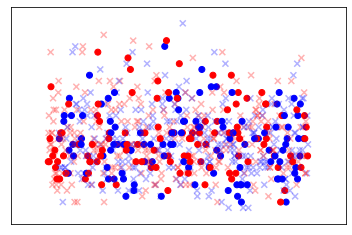

In [14]:
# Plot training+testing dataset
################################
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

# Plot the training points...
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
#   ...and testing points
plt.scatter(X_test[:, 0], X_test[:, 1], marker='x', c=y_test, cmap=cm_bright, alpha=0.3)

# Define limits/scale of plot axis
x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.xticks(())
plt.yticks(())

# Actually render the plot
print()
print("PLOT OF TRAINING EXAMPLES AND TEST DATASET")
print("Datasets: circles=training, light-crosses=test [and red=class_1, blue=class_2]")

plt.ioff()
plt.show()


In [16]:
#########################################################
# Create and parametrize a MLP neural network classifier
#########################################################
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=(1, ), activation='tanh', solver='sgd', 
                    alpha=0.0000001, batch_size=4, learning_rate='constant', learning_rate_init=0.005, 
                    power_t=0.5, max_iter=500, shuffle=True, random_state=11, tol=0.00001, 
                    verbose=True, warm_start=False, momentum=0.8, nesterovs_momentum=True, 
                    early_stopping=False, validation_fraction=0.2, 
                    beta_1=0.9, beta_2=0.999, epsilon=1e-08)
print(clf)

# Train the MLP classifier on training dataset
clf.fit(X_train, y_train)
print()

# Evaluate acuracy on test data
score = clf.score(X_test,y_test)
print("Acuracy (on test set) = ", score)

MLPClassifier(activation='tanh', alpha=1e-07, batch_size=4, beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(1,), learning_rate='constant',
              learning_rate_init=0.005, max_fun=15000, max_iter=500,
              momentum=0.8, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=11, shuffle=True, solver='sgd',
              tol=1e-05, validation_fraction=0.2, verbose=True,
              warm_start=False)
Iteration 1, loss = 3.89659787
Iteration 2, loss = 3.79548986
Iteration 3, loss = 3.76673169
Iteration 4, loss = 3.74006984
Iteration 5, loss = 3.71721066
Iteration 6, loss = 3.69599010
Iteration 7, loss = 3.67477859
Iteration 8, loss = 3.65125856
Iteration 9, loss = 3.63139003
Iteration 10, loss = 3.61167518
Iteration 11, loss = 3.59127259
Iteration 12, loss = 3.57211045
Iteration 13, loss = 3.55543377
Iteration 14, loss = 3.53932310
Iteration 15, loss = 3.52555285
Iteration 16, lo

In [17]:


# Plot the decision boundary. For that, we will assign a color to each
#   point in the mesh [x_min, x_max]x[y_min, y_max].

h = .02  # Step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

# Compute class probabilities for each mesh point
Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=cm, alpha=.8)

# Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
# and testing points
plt.scatter(X_test[:, 0], X_test[:, 1], marker='x', c=y_test, cmap=cm_bright, alpha=0.3)

# Axis ranges 
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())

# Print acuracy on plot
plt.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')

# Actually plot
plt.ioff()
plt.show()



ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 10001 is different from 2)